In [ ]:
# default_exp gbe.rtt.reliability

# Risk Taking Task - Reliability

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
        </div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.rtt.data_provider import RTTDataProvider
import trr265.gbe.rtt.scoring as rtt_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and is_baseline")

## Test-retest reliability

### Based on percentage gambles

#### Win

R[write to console]: Lade nötiges Paket: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.640,4.554,243.0,244.0,0.0,0.573,0.698,".64 (.57, .70)"
Single_random_raters,ICC2,0.640,4.568,243.0,243.0,0.0,0.574,0.698,".64 (.57, .70)"
Single_fixed_raters,ICC3,0.641,4.568,243.0,243.0,0.0,0.574,0.699,".64 (.57, .70)"
Average_raters_absolute,ICC1k,0.780,4.554,243.0,244.0,0.0,0.729,0.822,".78 (.73, .82)"
Average_random_raters,ICC2k,0.781,4.568,243.0,243.0,0.0,0.729,0.822,".78 (.73, .82)"
Average_fixed_raters,ICC3k,0.781,4.568,243.0,243.0,0.0,0.730,0.823,".78 (.73, .82)"


,variance,Percent
ID,0.067,0.640
Items,0.000,0.001
Residual,0.037,0.359
Total,0.104,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


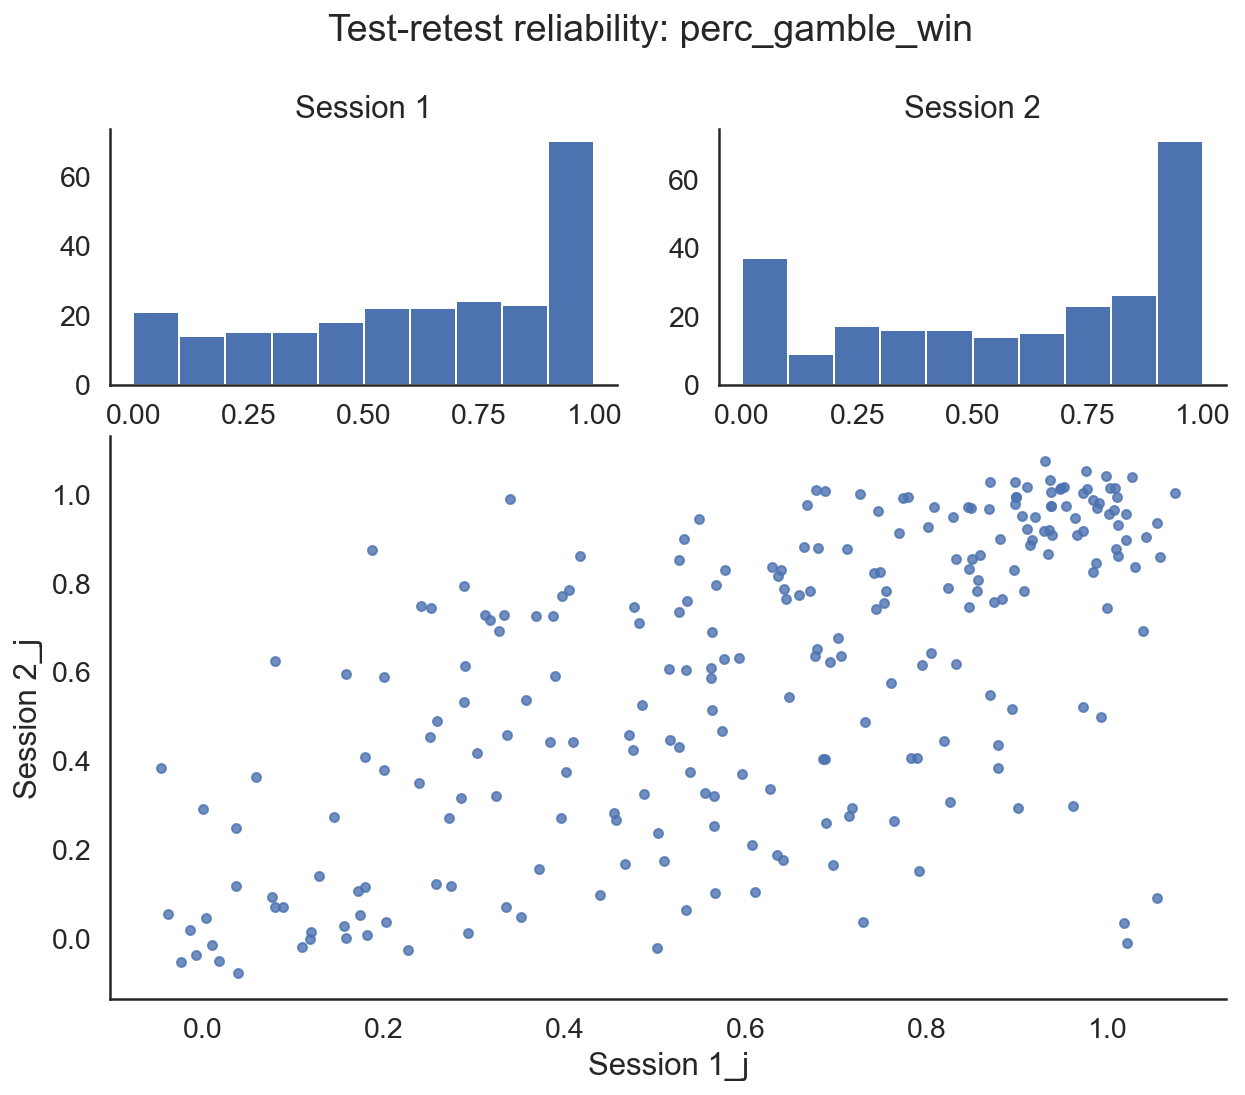

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.572,3.669,243.0,244.0,0.0,0.496,0.638,".57 (.50, .64)"
Single_random_raters,ICC2,0.578,3.958,243.0,243.0,0.0,0.491,0.652,".58 (.49, .65)"
Single_fixed_raters,ICC3,0.597,3.958,243.0,243.0,0.0,0.524,0.660,".60 (.52, .66)"
Average_raters_absolute,ICC1k,0.727,3.669,243.0,244.0,0.0,0.663,0.779,".73 (.66, .78)"
Average_random_raters,ICC2k,0.733,3.958,243.0,243.0,0.0,0.659,0.789,".73 (.66, .79)"
Average_fixed_raters,ICC3k,0.747,3.958,243.0,243.0,0.0,0.688,0.795,".75 (.69, .80)"


,variance,Percent
ID,0.052,0.578
Items,0.003,0.031
Residual,0.035,0.391
Total,0.090,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


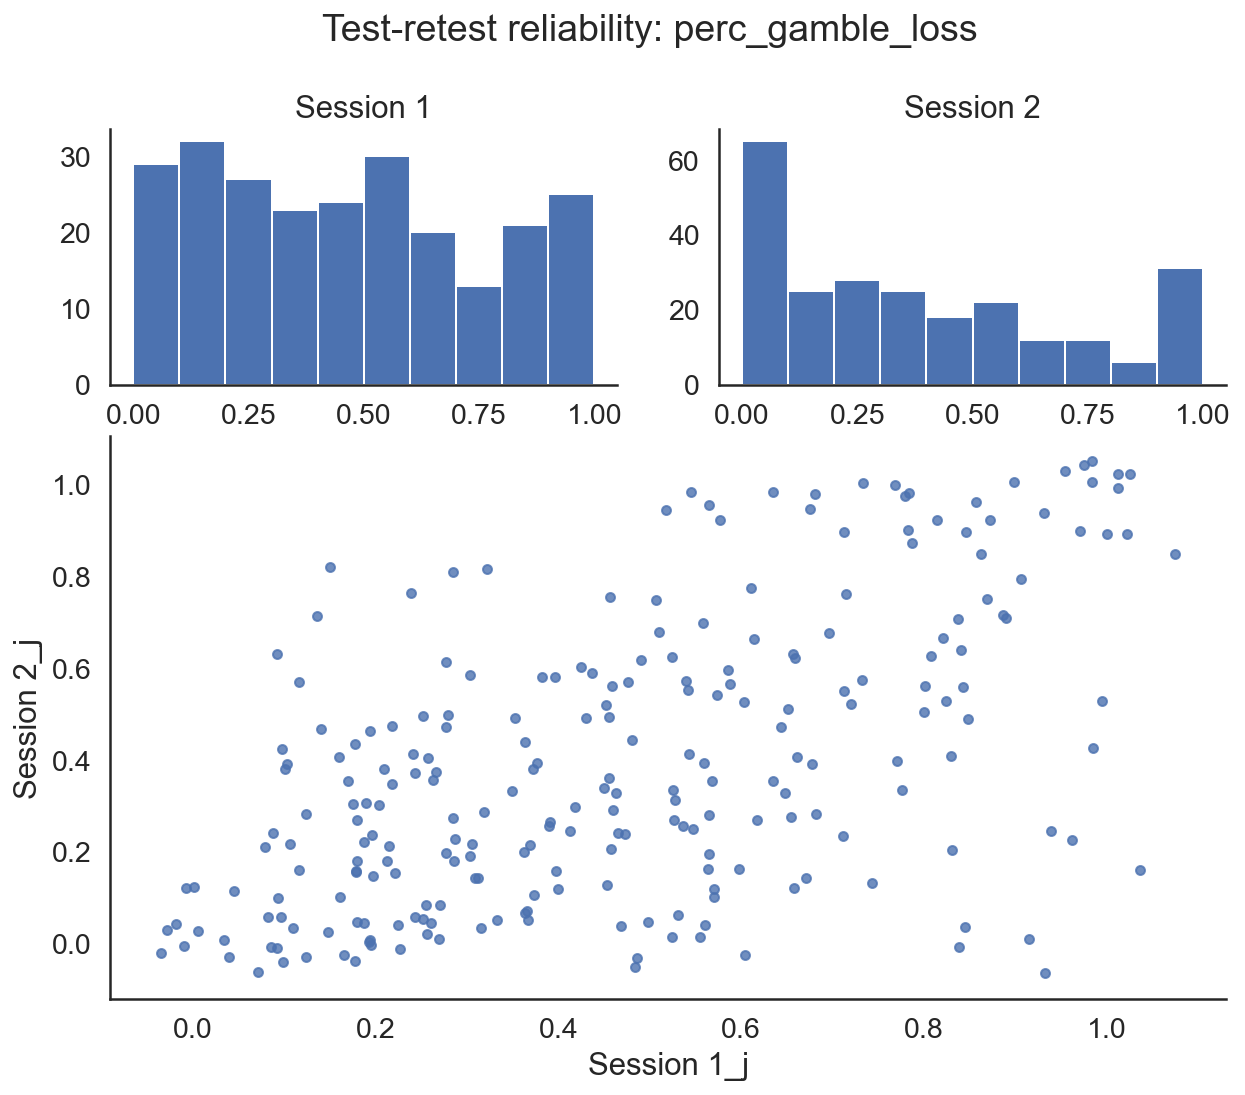

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.538,3.328,243.0,244.0,0.0,0.459,0.609,".54 (.46, .61)"
Single_random_raters,ICC2,0.541,3.435,243.0,243.0,0.0,0.461,0.613,".54 (.46, .61)"
Single_fixed_raters,ICC3,0.549,3.435,243.0,243.0,0.0,0.471,0.619,".55 (.47, .62)"
Average_raters_absolute,ICC1k,0.699,3.328,243.0,244.0,0.0,0.629,0.757,".70 (.63, .76)"
Average_random_raters,ICC2k,0.702,3.435,243.0,243.0,0.0,0.631,0.760,".70 (.63, .76)"
Average_fixed_raters,ICC3k,0.709,3.435,243.0,243.0,0.0,0.640,0.764,".71 (.64, .76)"


,variance,Percent
ID,0.049,0.541
Items,0.001,0.014
Residual,0.040,0.444
Total,0.091,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


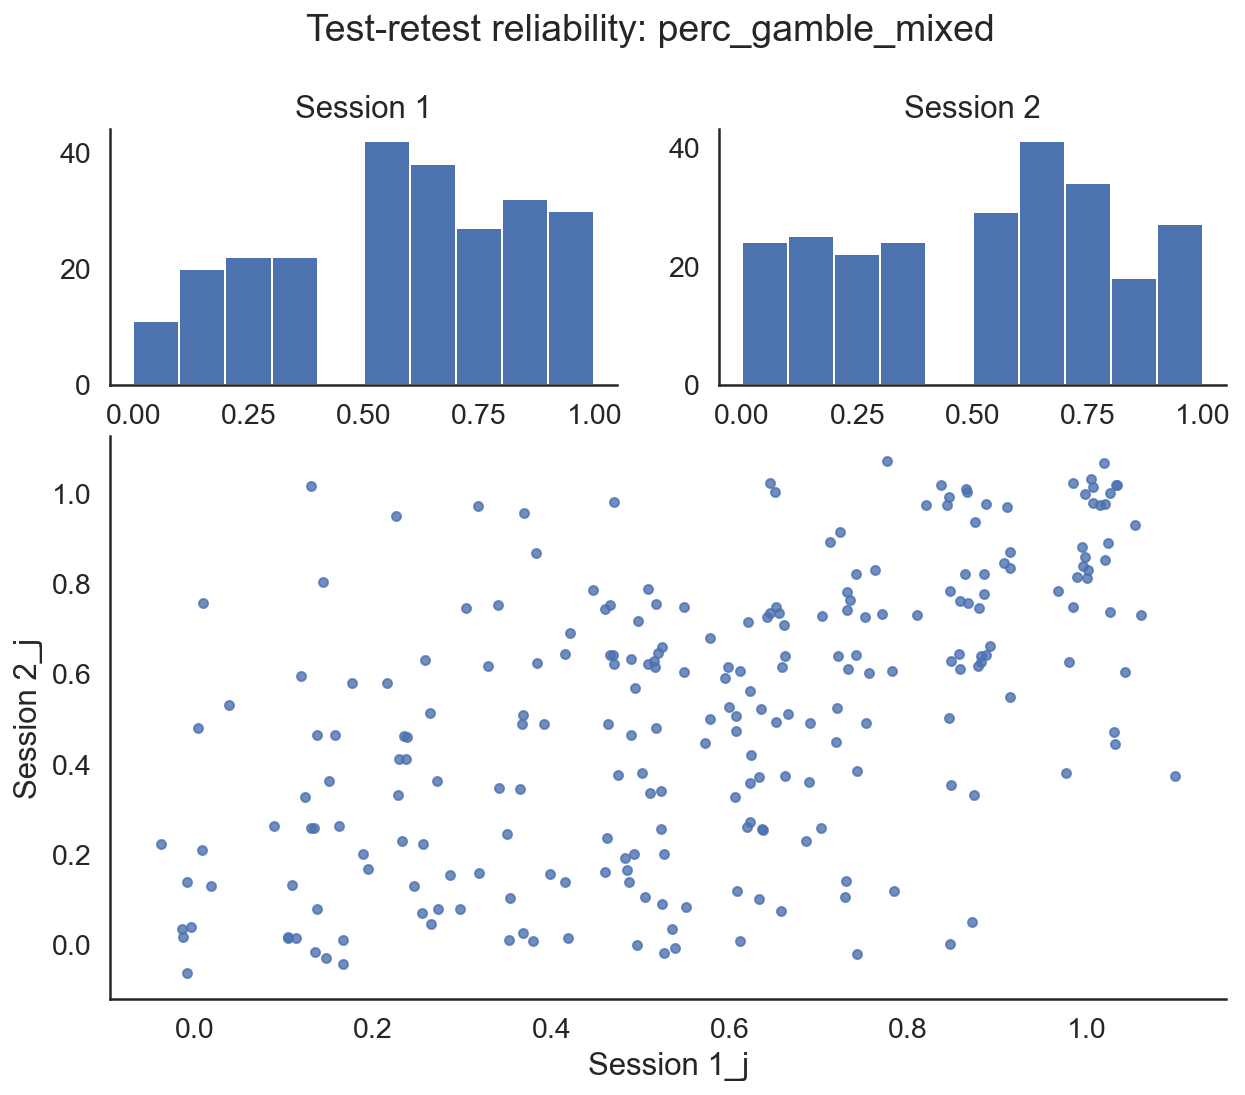

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_mixed', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_sep`).

#### Win

In [ ]:
_df = rtt_scoring.get_perc_gamble_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.632,4.434,243.0,244.0,0.0,0.564,0.691,".63 (.56, .69)"
Single_random_raters,ICC2,0.632,4.460,243.0,243.0,0.0,0.565,0.692,".63 (.56, .69)"
Single_fixed_raters,ICC3,0.634,4.460,243.0,243.0,0.0,0.566,0.693,".63 (.57, .69)"
Average_raters_absolute,ICC1k,0.774,4.434,243.0,244.0,0.0,0.721,0.817,".77 (.72, .82)"
Average_random_raters,ICC2k,0.775,4.460,243.0,243.0,0.0,0.722,0.818,".77 (.72, .82)"
Average_fixed_raters,ICC3k,0.776,4.460,243.0,243.0,0.0,0.723,0.819,".78 (.72, .82)"


,variance,Percent
ID,0.051,0.632
Items,0.000,0.002
Residual,0.030,0.365
Total,0.081,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


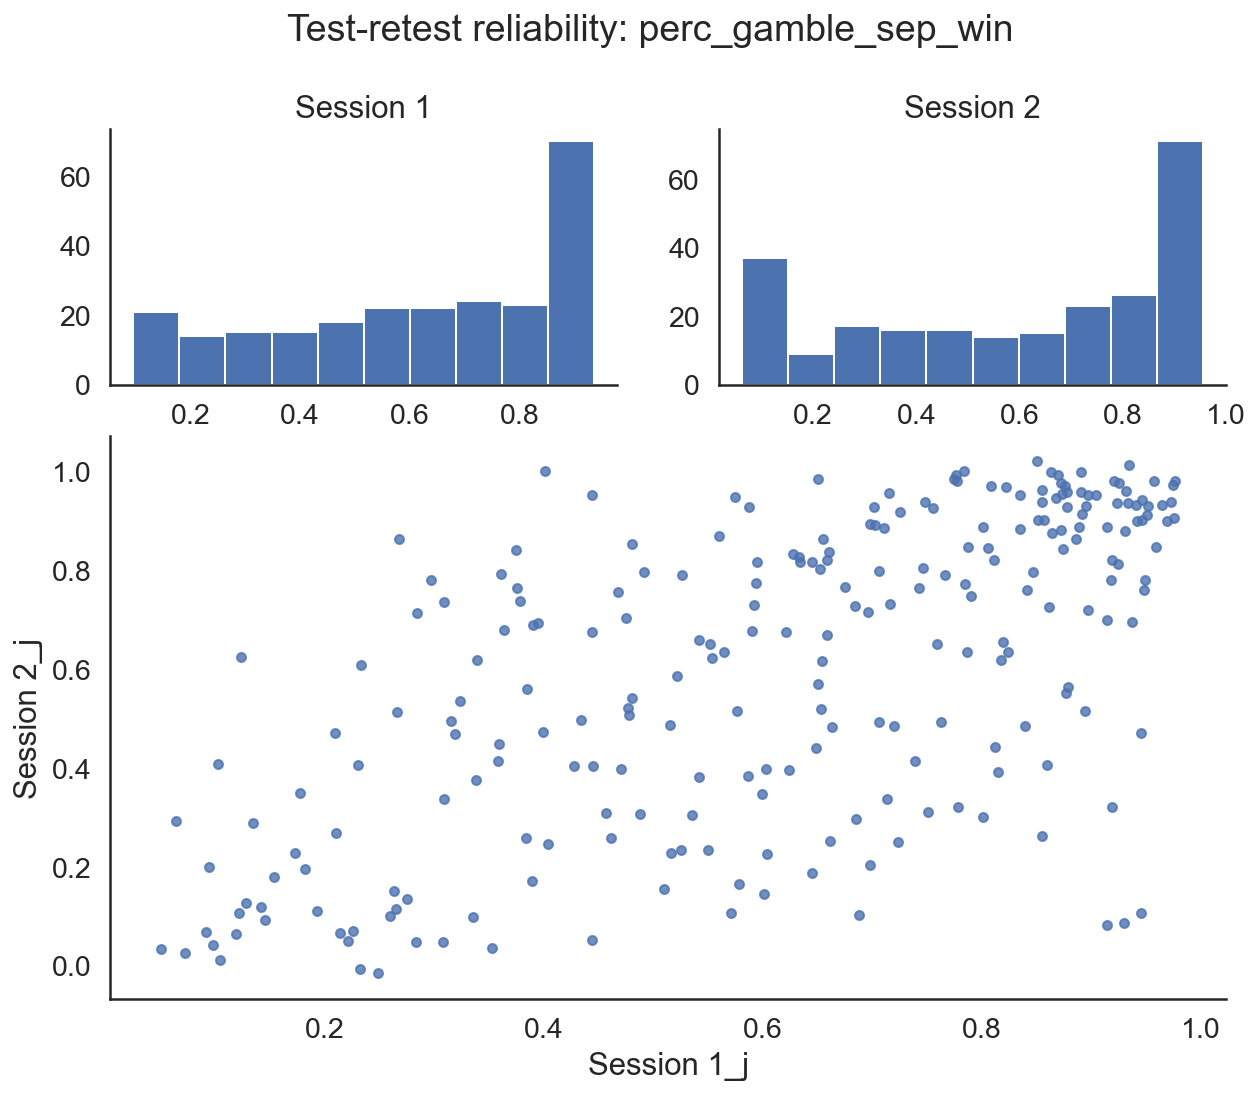

In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.546,3.404,243.0,244.0,0.0,0.467,0.616,".55 (.47, .62)"
Single_random_raters,ICC2,0.557,3.836,243.0,243.0,0.0,0.451,0.642,".56 (.45, .64)"
Single_fixed_raters,ICC3,0.586,3.836,243.0,243.0,0.0,0.513,0.652,".59 (.51, .65)"
Average_raters_absolute,ICC1k,0.706,3.404,243.0,244.0,0.0,0.637,0.762,".71 (.64, .76)"
Average_random_raters,ICC2k,0.716,3.836,243.0,243.0,0.0,0.622,0.782,".72 (.62, .78)"
Average_fixed_raters,ICC3k,0.739,3.836,243.0,243.0,0.0,0.678,0.789,".74 (.68, .79)"


,variance,Percent
ID,0.035,0.557
Items,0.003,0.050
Residual,0.025,0.393
Total,0.063,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


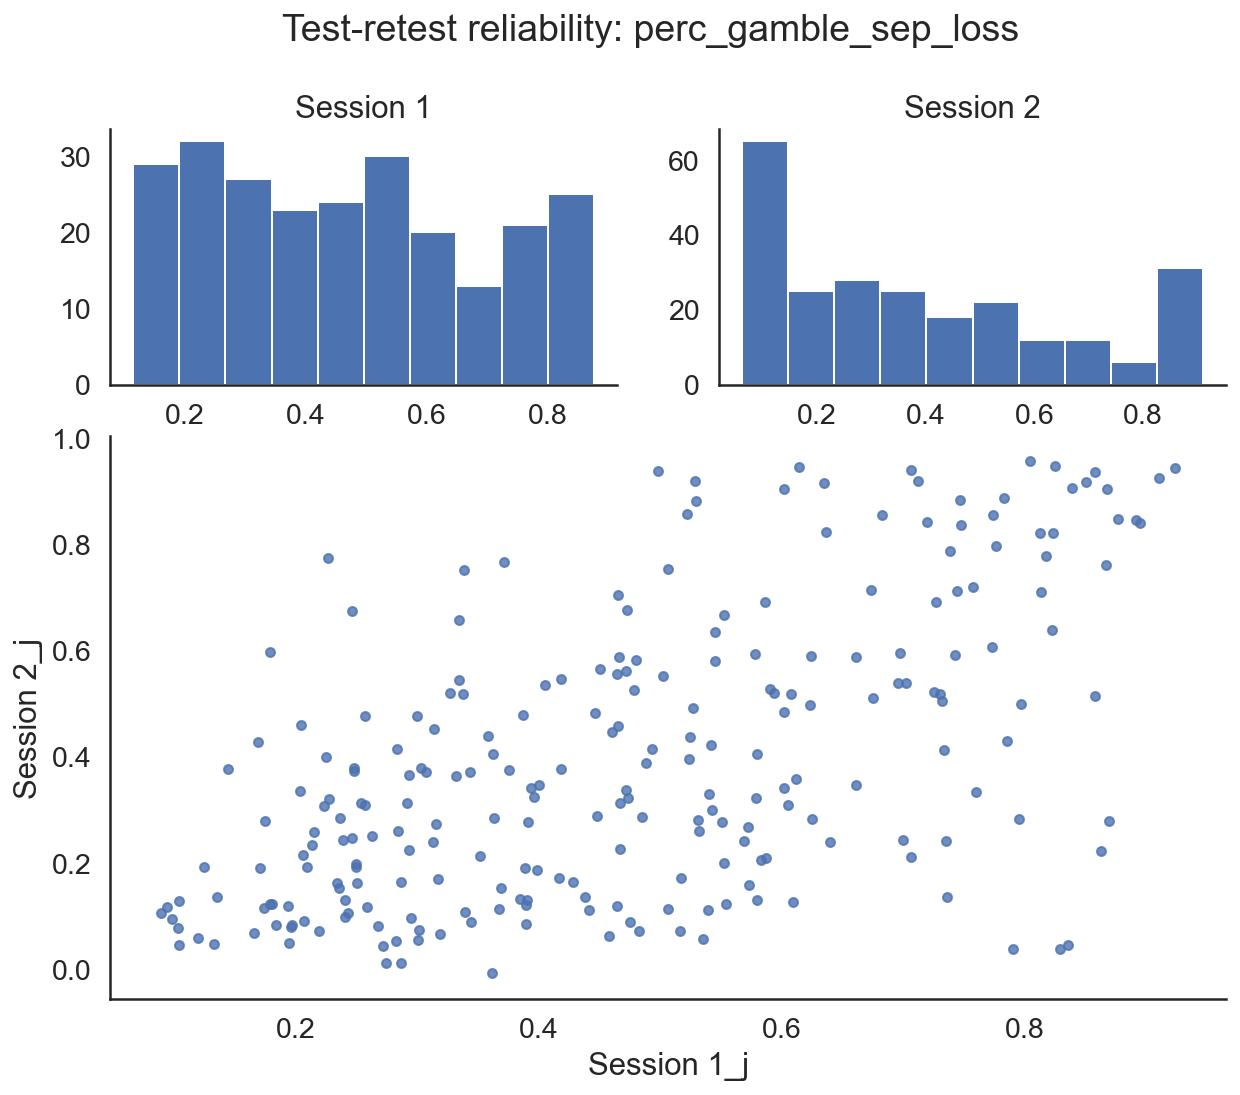

In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.519,3.158,243.0,244.0,0.0,0.438,0.592,".52 (.44, .59)"
Single_random_raters,ICC2,0.526,3.366,243.0,243.0,0.0,0.438,0.603,".53 (.44, .60)"
Single_fixed_raters,ICC3,0.542,3.366,243.0,243.0,0.0,0.463,0.612,".54 (.46, .61)"
Average_raters_absolute,ICC1k,0.683,3.158,243.0,244.0,0.0,0.609,0.744,".68 (.61, .74)"
Average_random_raters,ICC2k,0.689,3.366,243.0,243.0,0.0,0.609,0.752,".69 (.61, .75)"
Average_fixed_raters,ICC3k,0.703,3.366,243.0,243.0,0.0,0.633,0.760,".70 (.63, .76)"


,variance,Percent
ID,0.028,0.526
Items,0.002,0.029
Residual,0.023,0.445
Total,0.053,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


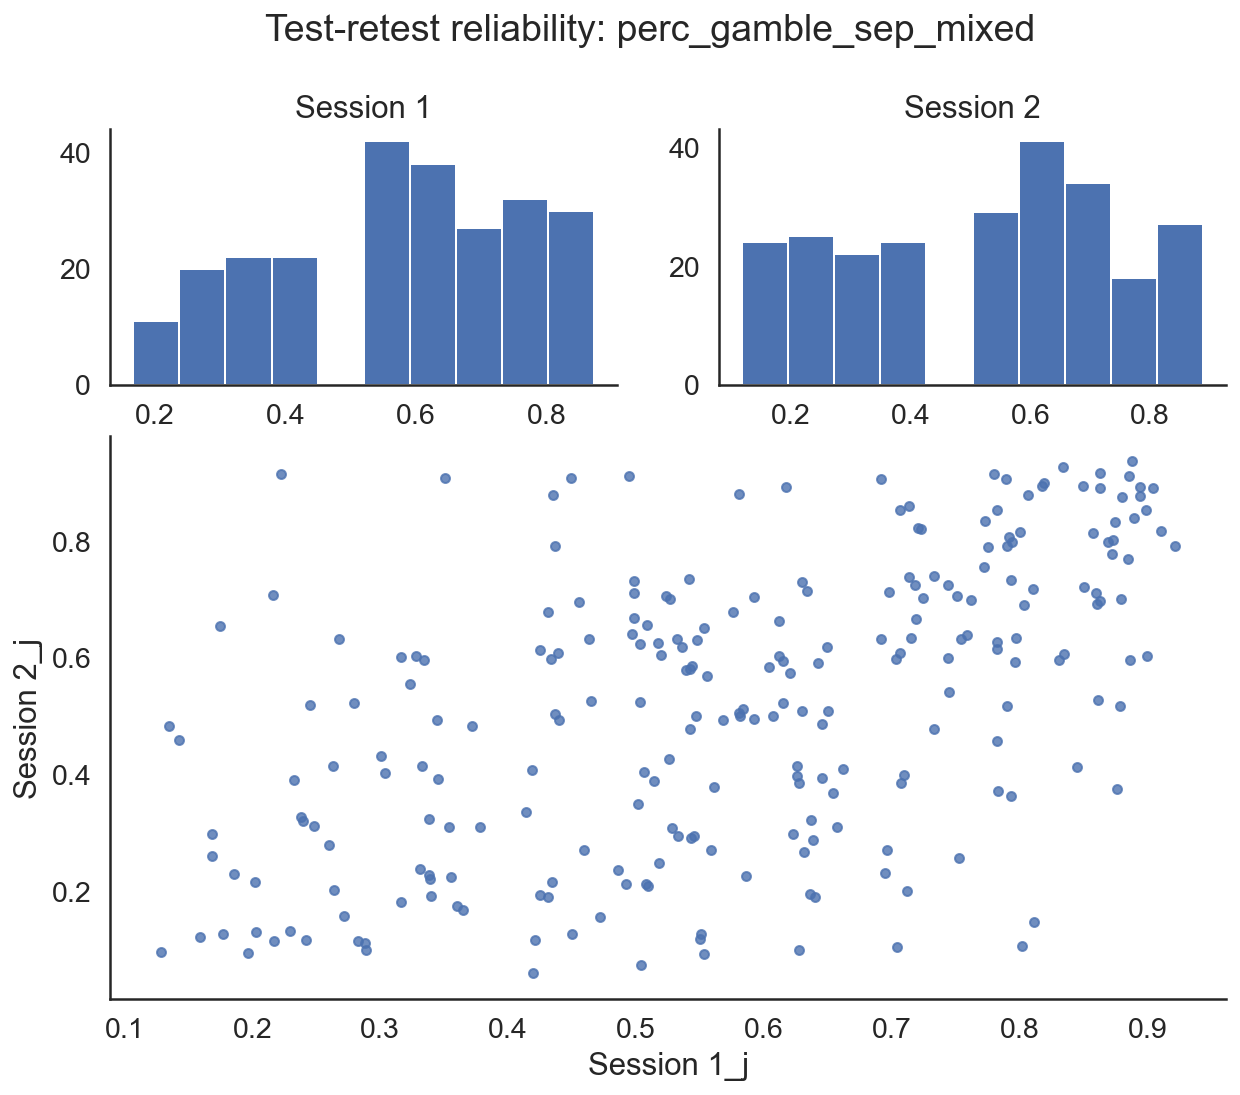

In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_mixed', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_joint`).

#### Win

In [ ]:
_df, ms = rtt_scoring.get_perc_gamble_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.809,9.445,243.0,244.0,0.0,0.769,0.842,".81 (.77, .84)"
Single_random_raters,ICC2,0.809,9.487,243.0,243.0,0.0,0.769,0.842,".81 (.77, .84)"
Single_fixed_raters,ICC3,0.809,9.487,243.0,243.0,0.0,0.770,0.843,".81 (.77, .84)"
Average_raters_absolute,ICC1k,0.894,9.445,243.0,244.0,0.0,0.869,0.914,".89 (.87, .91)"
Average_random_raters,ICC2k,0.894,9.487,243.0,243.0,0.0,0.869,0.914,".89 (.87, .91)"
Average_fixed_raters,ICC3k,0.895,9.487,243.0,243.0,0.0,0.870,0.915,".89 (.87, .91)"


,variance,Percent
ID,0.066,0.809
Items,0.000,0.001
Residual,0.016,0.191
Total,0.081,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


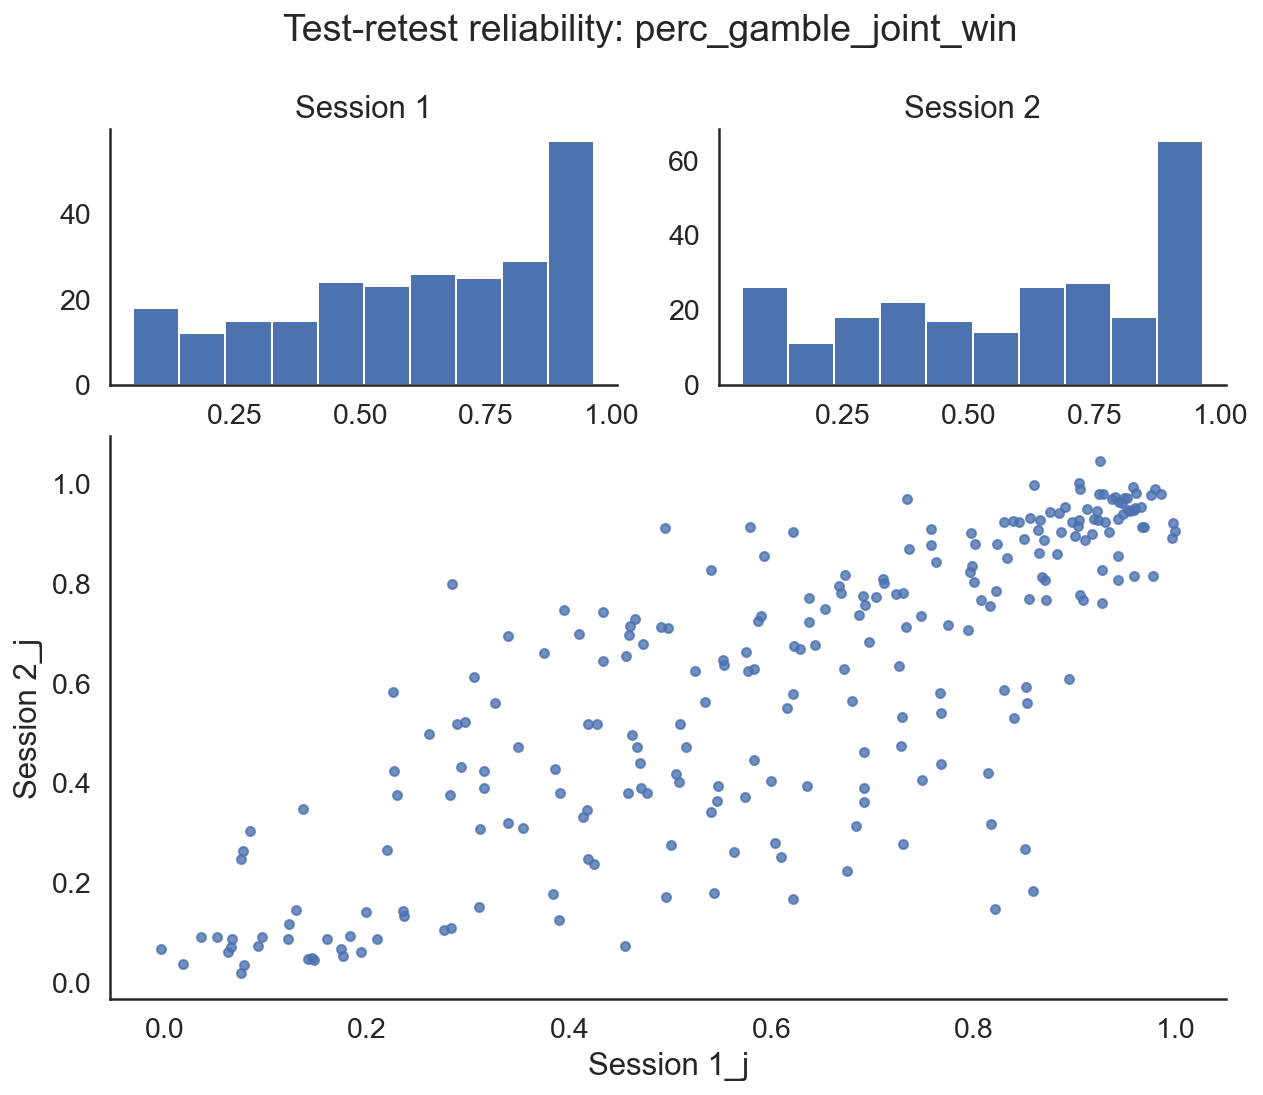

In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.790,8.516,243.0,244.0,0.0,0.747,0.826,".79 (.75, .83)"
Single_random_raters,ICC2,0.791,9.155,243.0,243.0,0.0,0.738,0.833,".79 (.74, .83)"
Single_fixed_raters,ICC3,0.803,9.155,243.0,243.0,0.0,0.762,0.838,".80 (.76, .84)"
Average_raters_absolute,ICC1k,0.883,8.516,243.0,244.0,0.0,0.855,0.905,".88 (.85, .90)"
Average_random_raters,ICC2k,0.884,9.155,243.0,243.0,0.0,0.849,0.909,".88 (.85, .91)"
Average_fixed_raters,ICC3k,0.891,9.155,243.0,243.0,0.0,0.865,0.912,".89 (.87, .91)"


,variance,Percent
ID,0.049,0.791
Items,0.001,0.015
Residual,0.012,0.194
Total,0.062,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


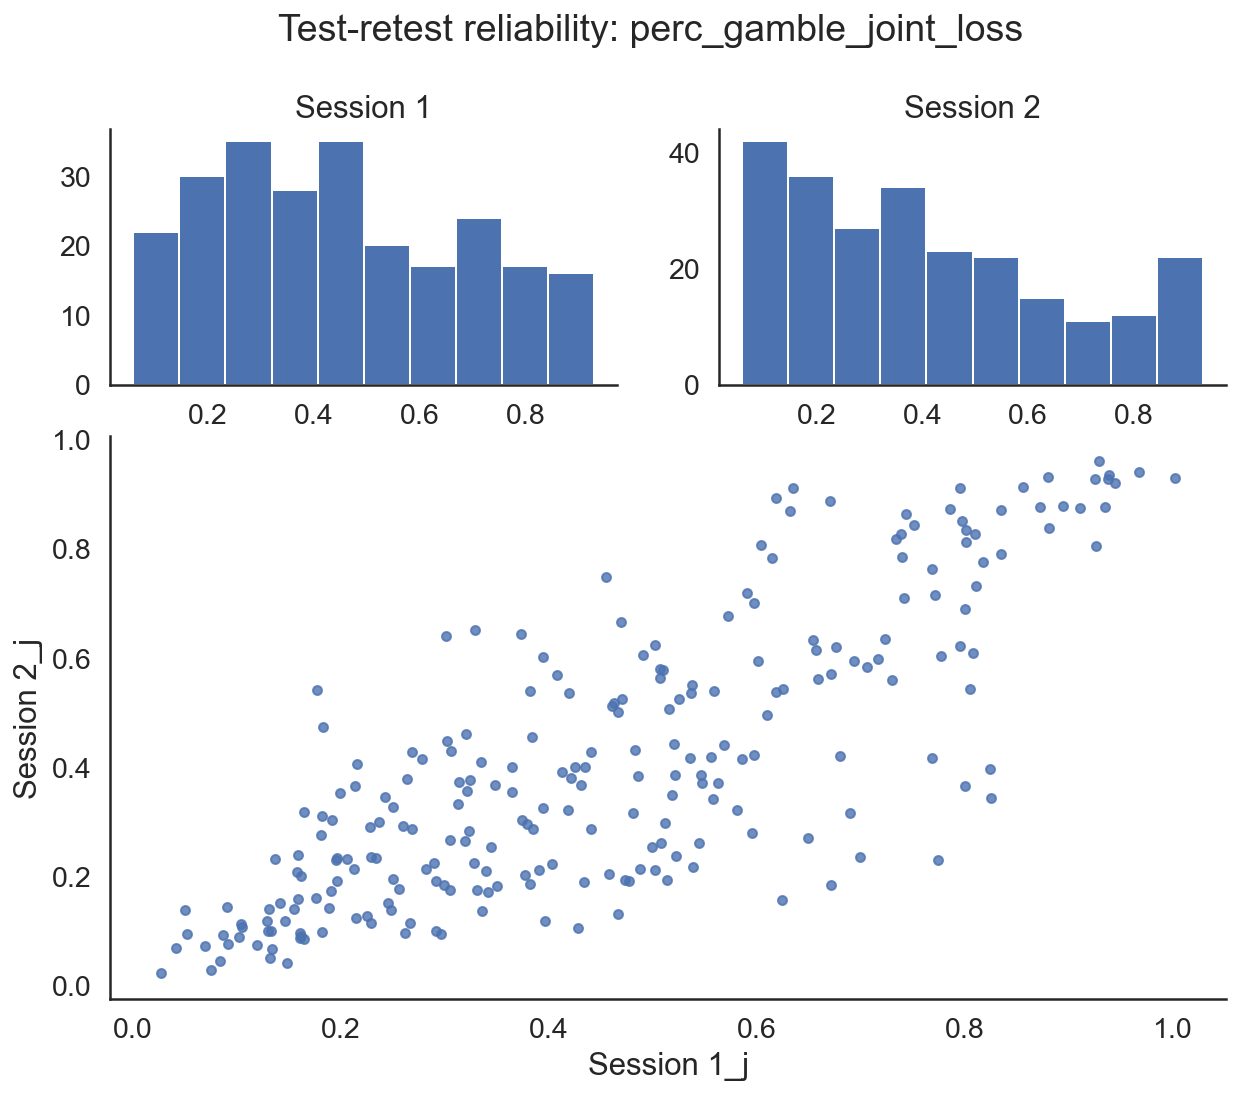

In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.845,11.894,243.0,244.0,0.0,0.812,0.873,".84 (.81, .87)"
Single_random_raters,ICC2,0.845,12.244,243.0,243.0,0.0,0.811,0.874,".85 (.81, .87)"
Single_fixed_raters,ICC3,0.849,12.244,243.0,243.0,0.0,0.817,0.876,".85 (.82, .88)"
Average_raters_absolute,ICC1k,0.916,11.894,243.0,244.0,0.0,0.896,0.932,".92 (.90, .93)"
Average_random_raters,ICC2k,0.916,12.244,243.0,243.0,0.0,0.895,0.933,".92 (.90, .93)"
Average_fixed_raters,ICC3k,0.918,12.244,243.0,243.0,0.0,0.899,0.934,".92 (.90, .93)"


,variance,Percent
ID,0.045,0.845
Items,0.000,0.004
Residual,0.008,0.150
Total,0.053,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


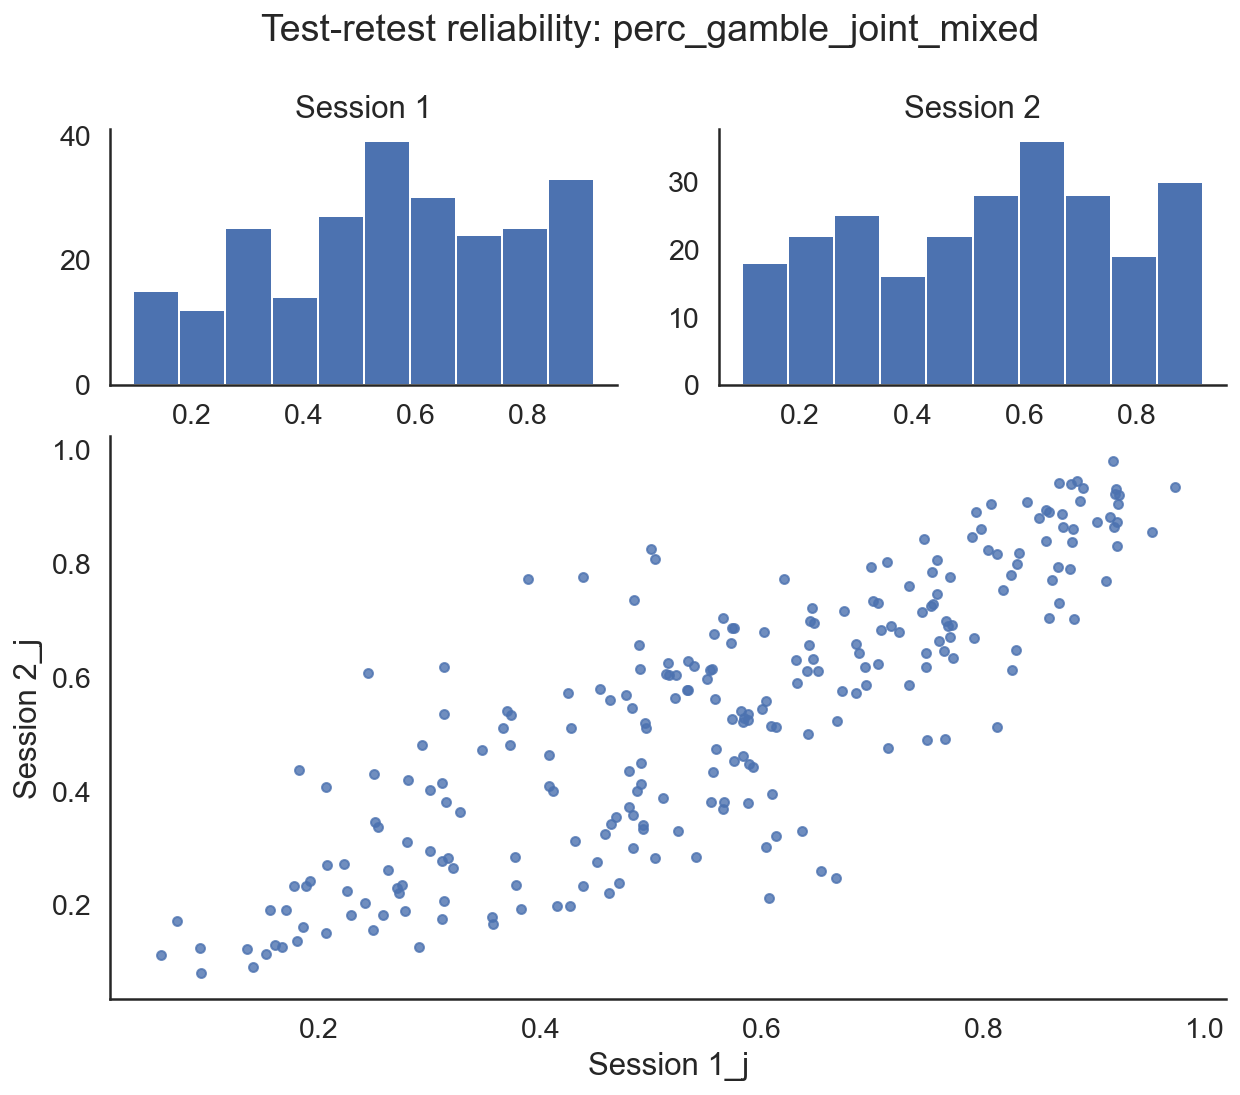

In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_mixed', add_jitter = True)

### Based on model-calculated variances

#### Win

In [ ]:
iccs_mod_win = stats.get_model_calculated_icc(ms['win'])
iccs_mod_win['icc']

R[write to console]: Lade nötiges Paket: insight



0.7844881746517791

#### Loss

In [ ]:
iccs_mod_loss = stats.get_model_calculated_icc(ms['loss'])
iccs_mod_loss['icc']

0.7233511640104812

#### Win

In [ ]:
iccs_mod_mixed = stats.get_model_calculated_icc(ms['mixed'])
iccs_mod_mixed['icc']

0.7535577347177187

## Comparison of methods

### All methods

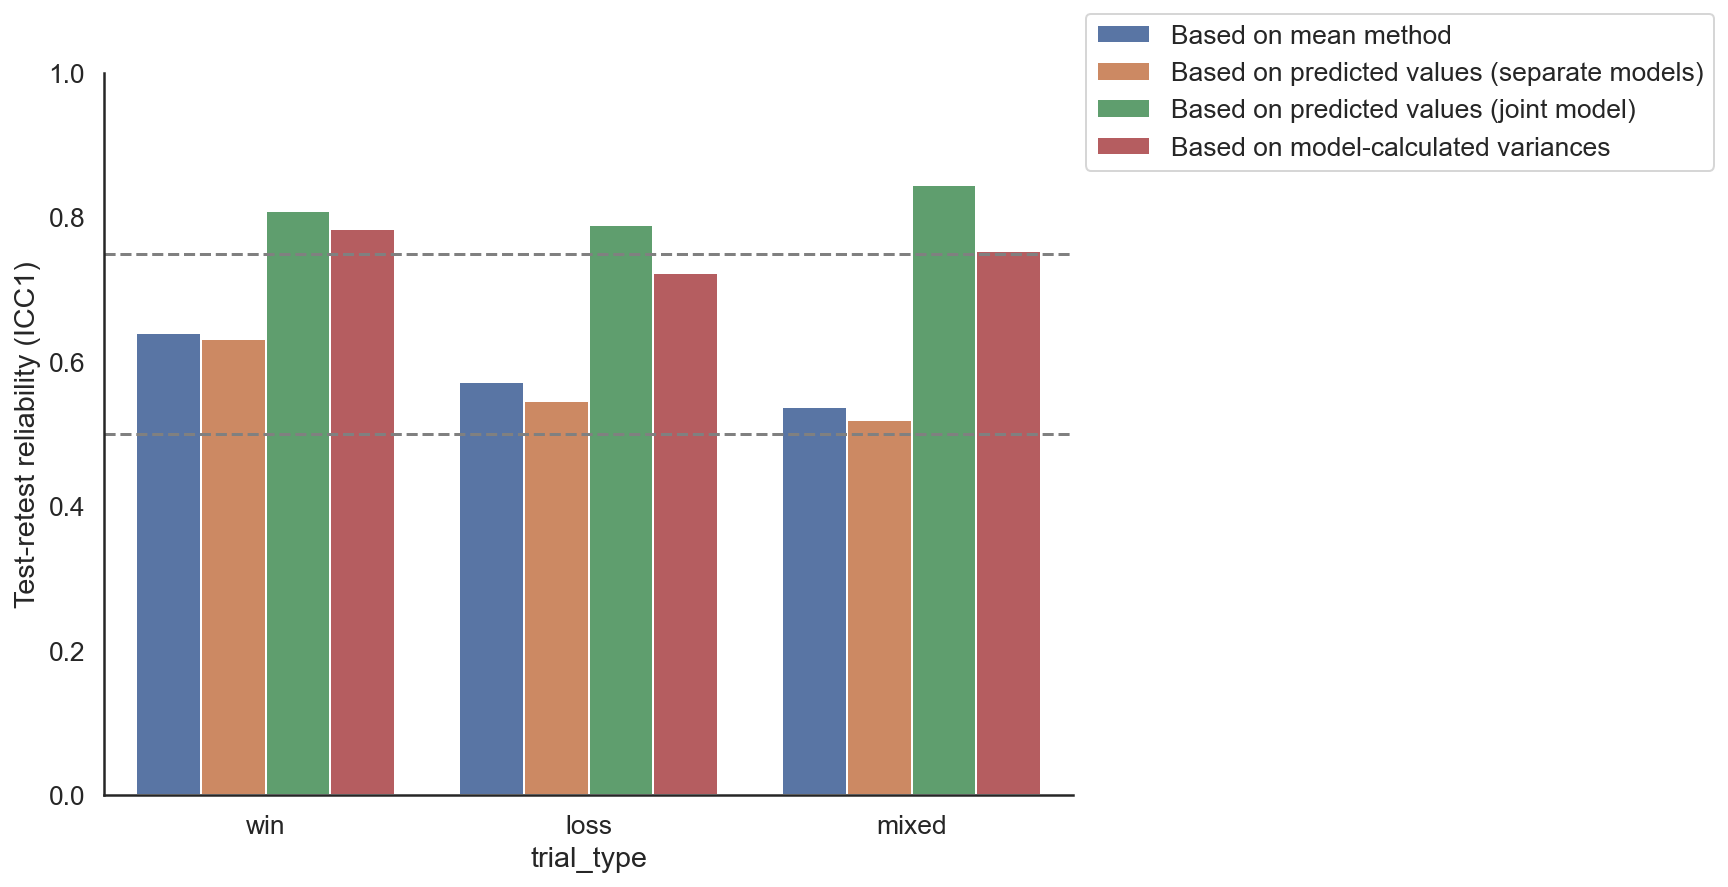

In [ ]:
iccs = {
    "Based on mean method_win": iccs_mean_win,
    "Based on mean method_loss": iccs_mean_loss,
    "Based on mean method_mixed": iccs_mean_mixed,
    "trial_sep_win": iccs_trial_sep_win,
    "trial_sep_loss": iccs_trial_sep_loss,
    "trial_sep_mixed": iccs_trial_sep_mixed,
    "trial_joint_win": iccs_trial_joint_win,
    "trial_joint_loss": iccs_trial_joint_loss,
    "trial_joint_mixed": iccs_trial_joint_mixed,
    "model_calc_win": iccs_mod_win,
    "model_calc_loss": iccs_mod_loss,
    "model_calc_mixed": iccs_mod_mixed
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

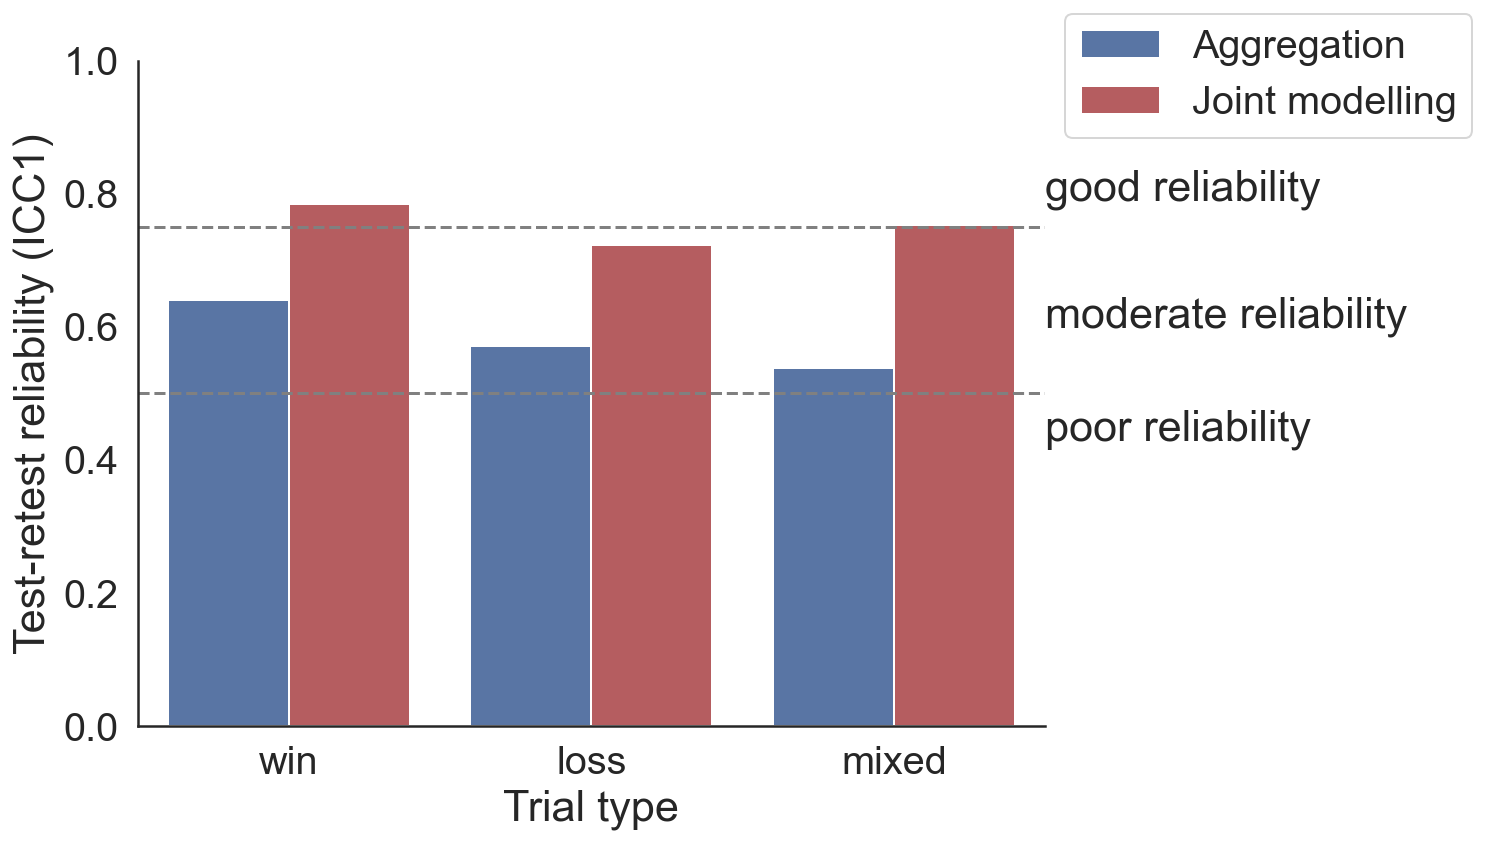

In [ ]:
iccs = {
    "Aggregation_win": iccs_mean_win,
    "Aggregation_loss": iccs_mean_loss,
    "Aggregation_mixed": iccs_mean_mixed,
    "Joint modelling_win": iccs_mod_win,
    "Joint modelling_loss": iccs_mod_loss,
    "Joint modelling_mixed": iccs_mod_mixed
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 2.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Trial type');


## Variance proportions

### Win

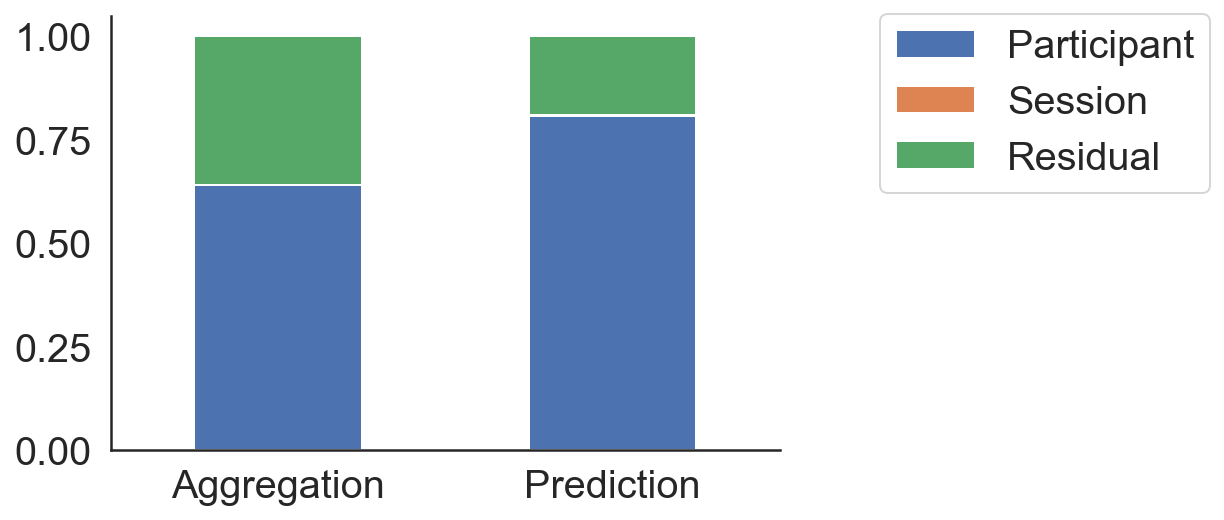

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
#ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.640088,0.001168,0.358745
Prediction,0.808602,0.000837,0.190562


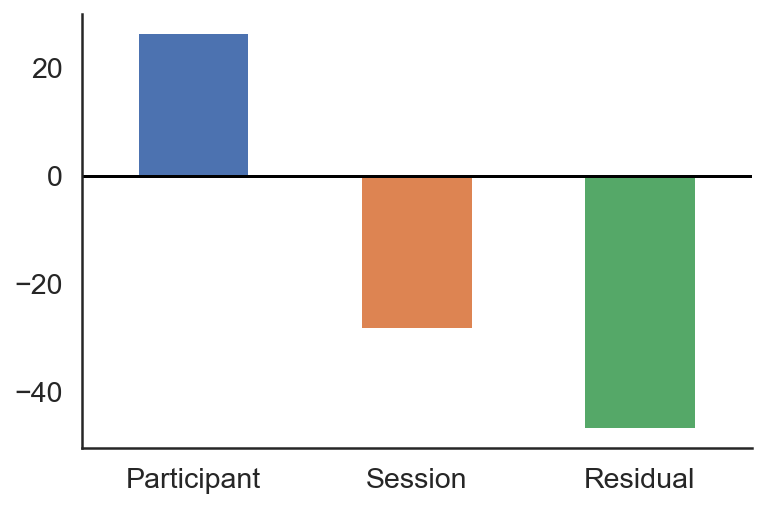

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

ax = var_comp_plot_2({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
ax.get_legend().remove()

### Loss

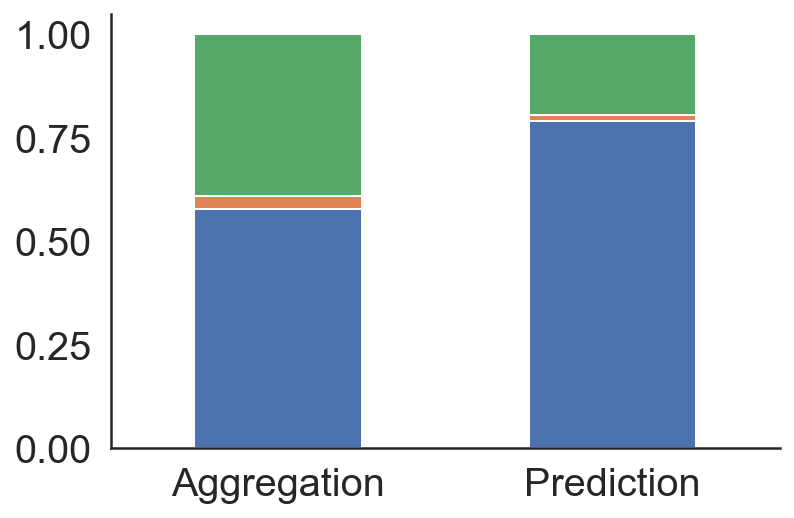

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.578237,0.030779,0.390984
Prediction,0.791356,0.014562,0.194082


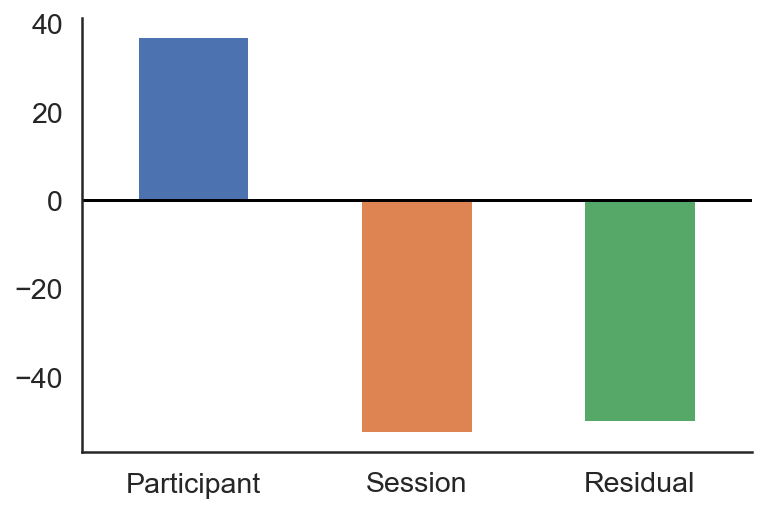

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

### Mixed

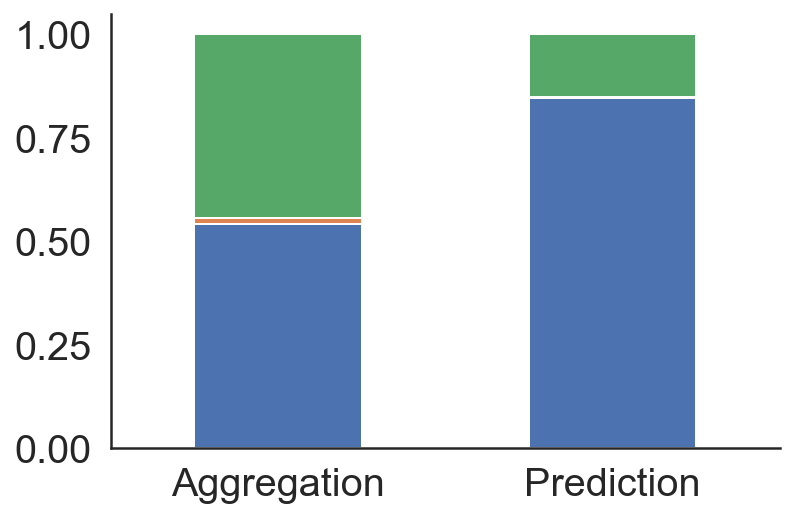

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.541186,0.014381,0.444434
Prediction,0.845227,0.004430,0.150343


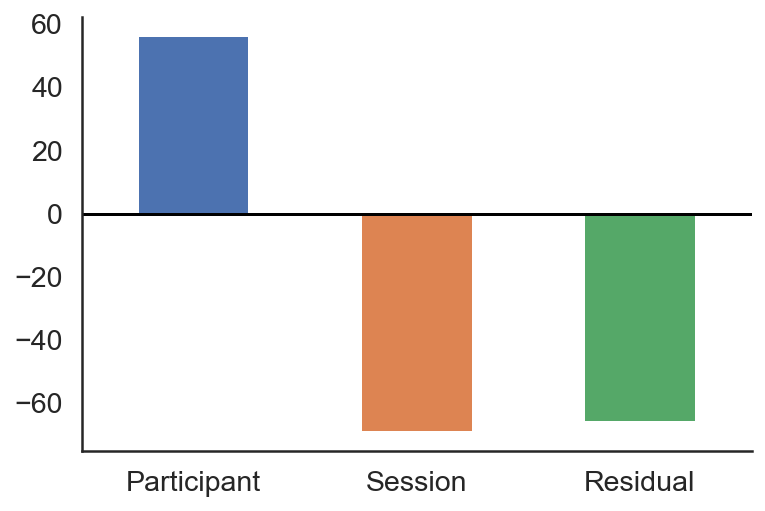

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

## Effect of time

In [ ]:
gbe = dp.get_gbe_data()

In [ ]:
scores = stats.get_scores(dp, dp.get_rtt_data, rtt_scoring.get_perc_gamble_predicted_joint)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



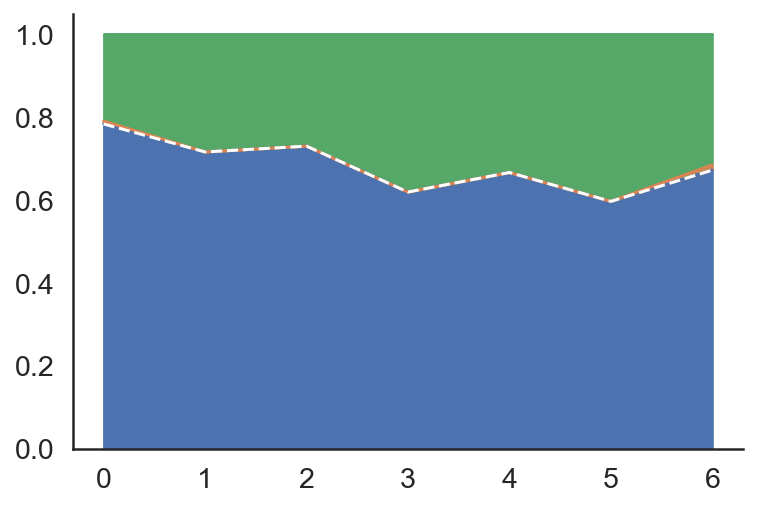

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_win")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



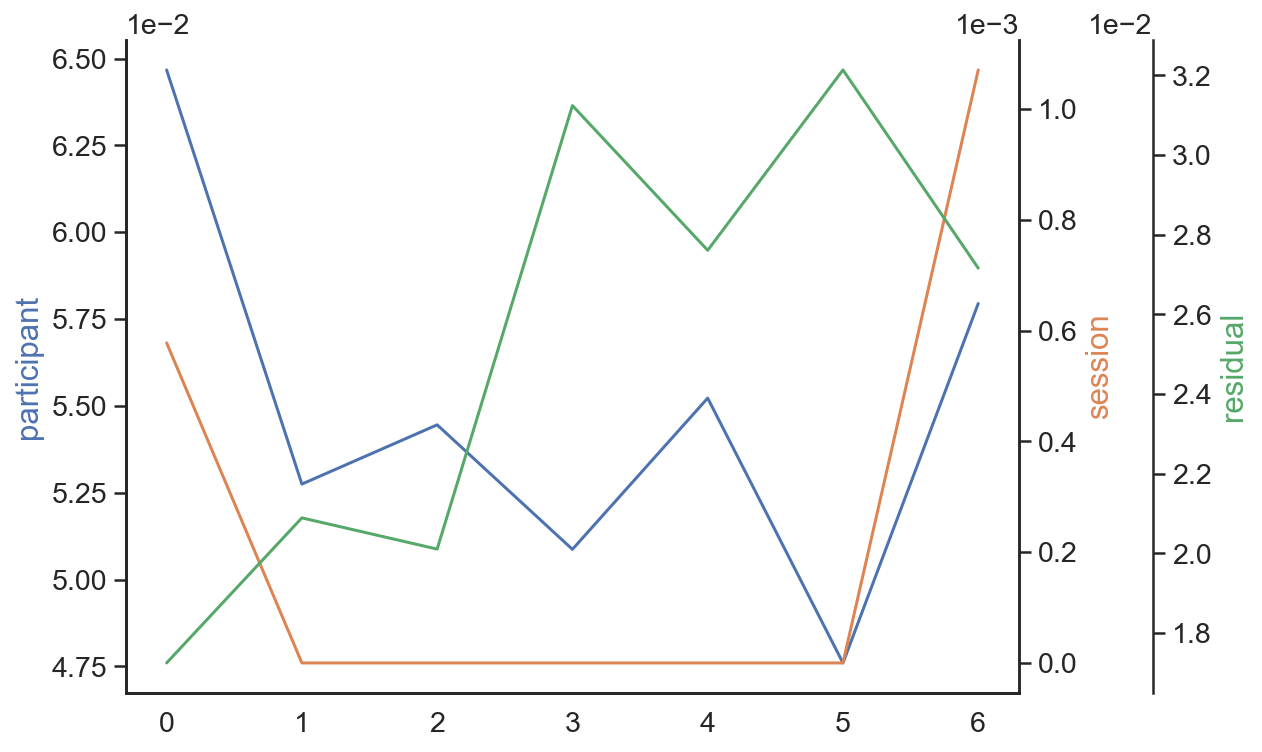

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



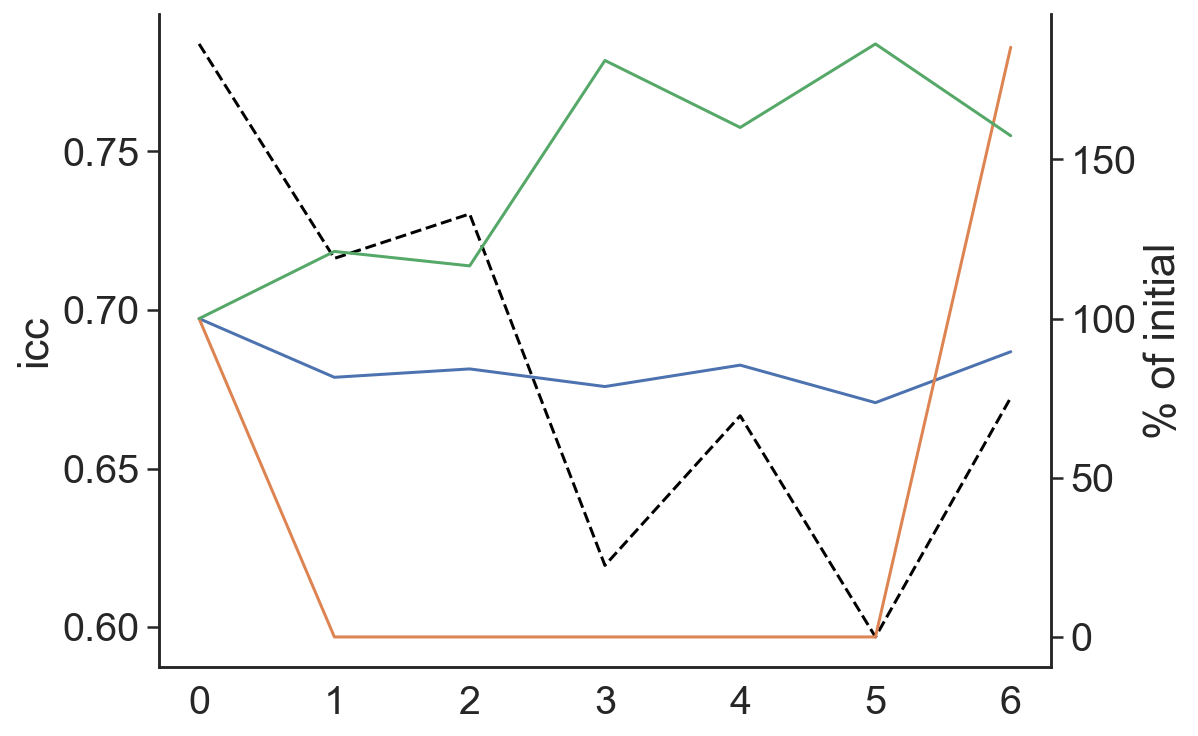

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



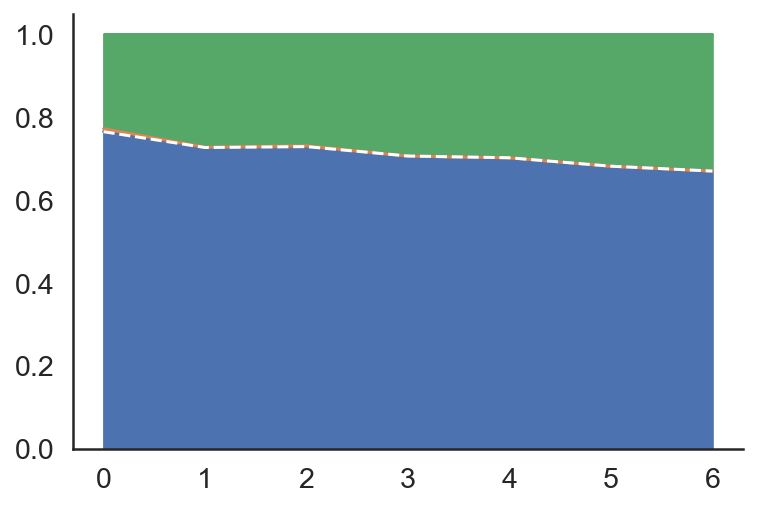

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_loss")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



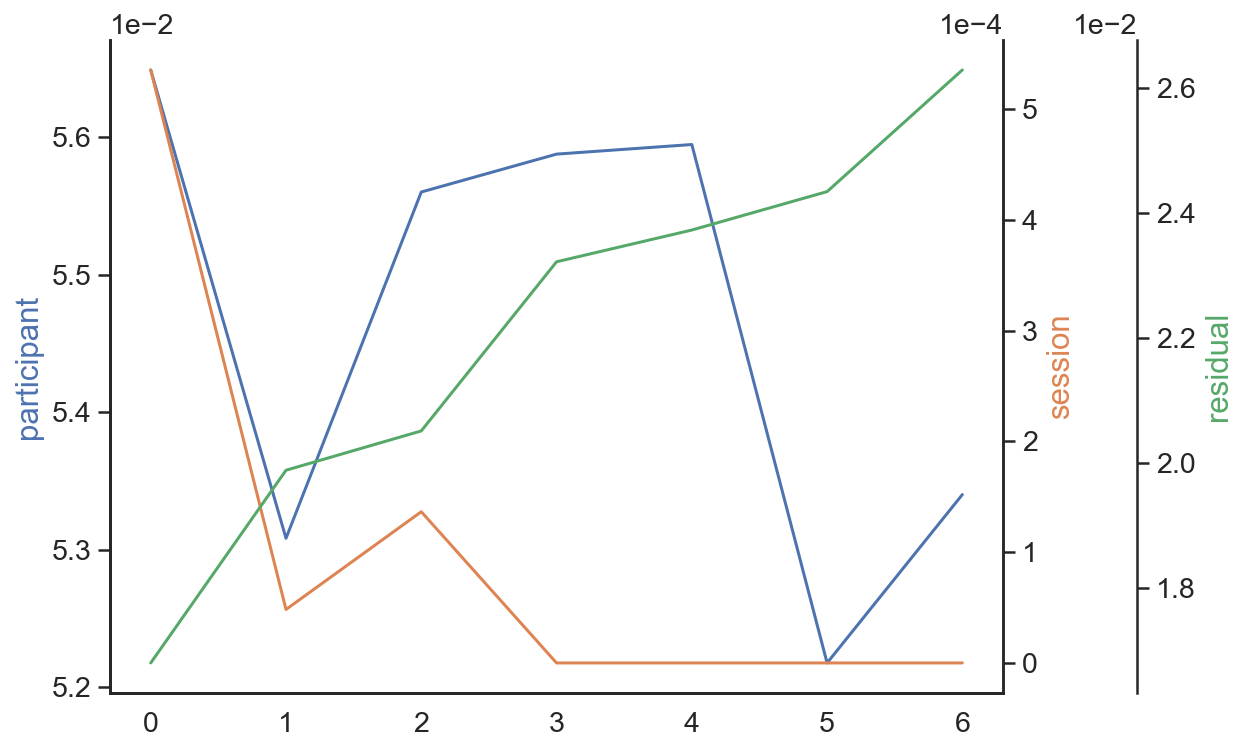

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



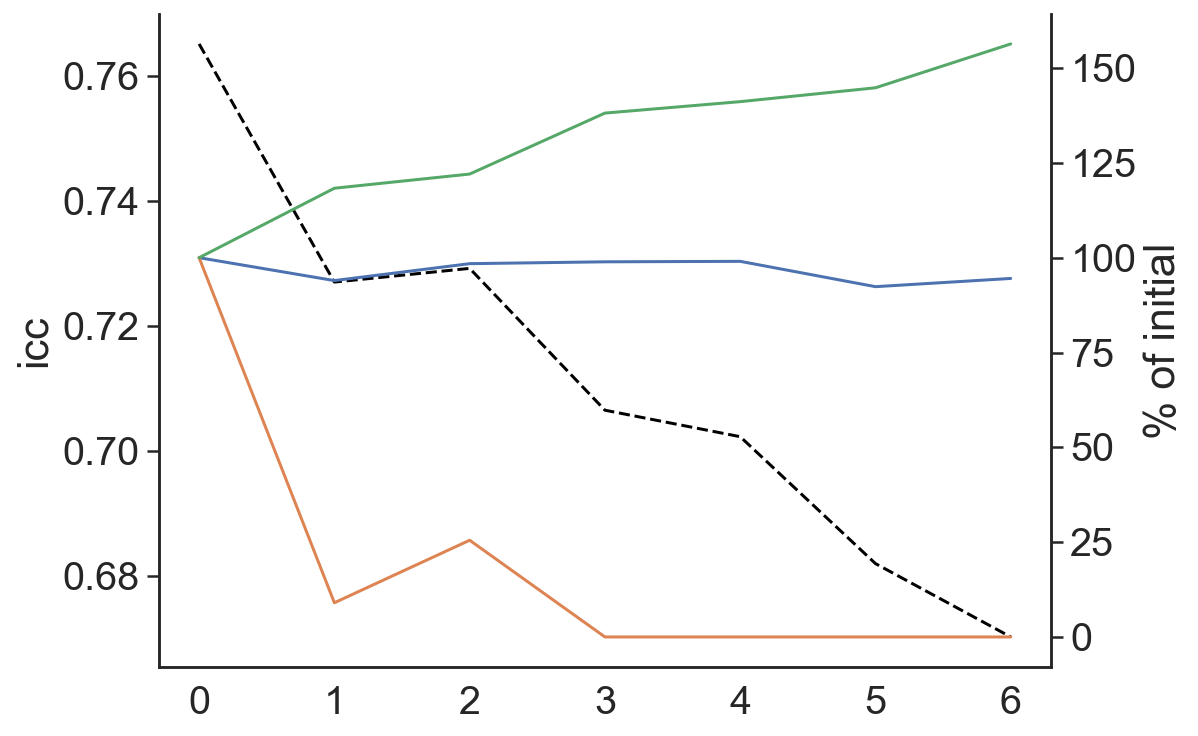

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



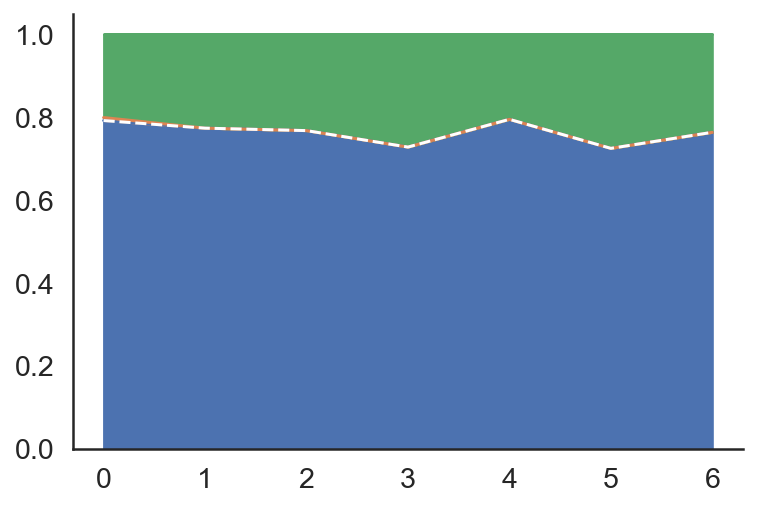

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_mixed")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



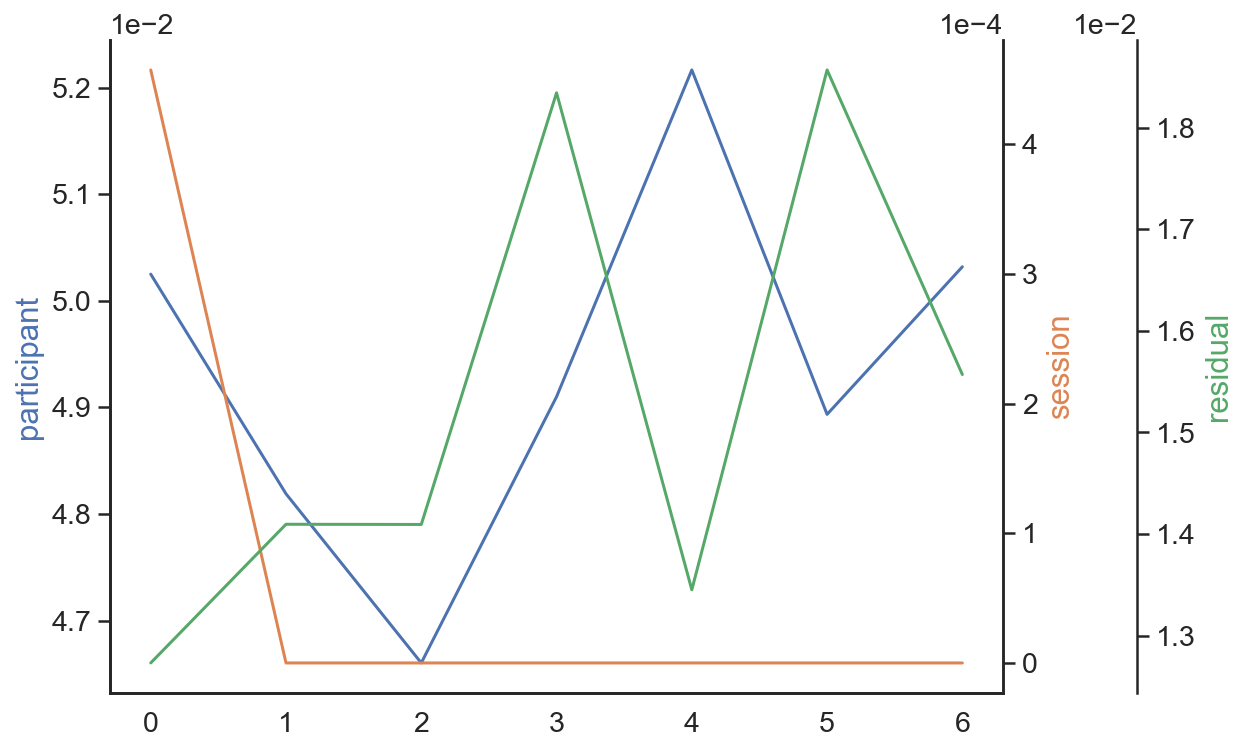

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



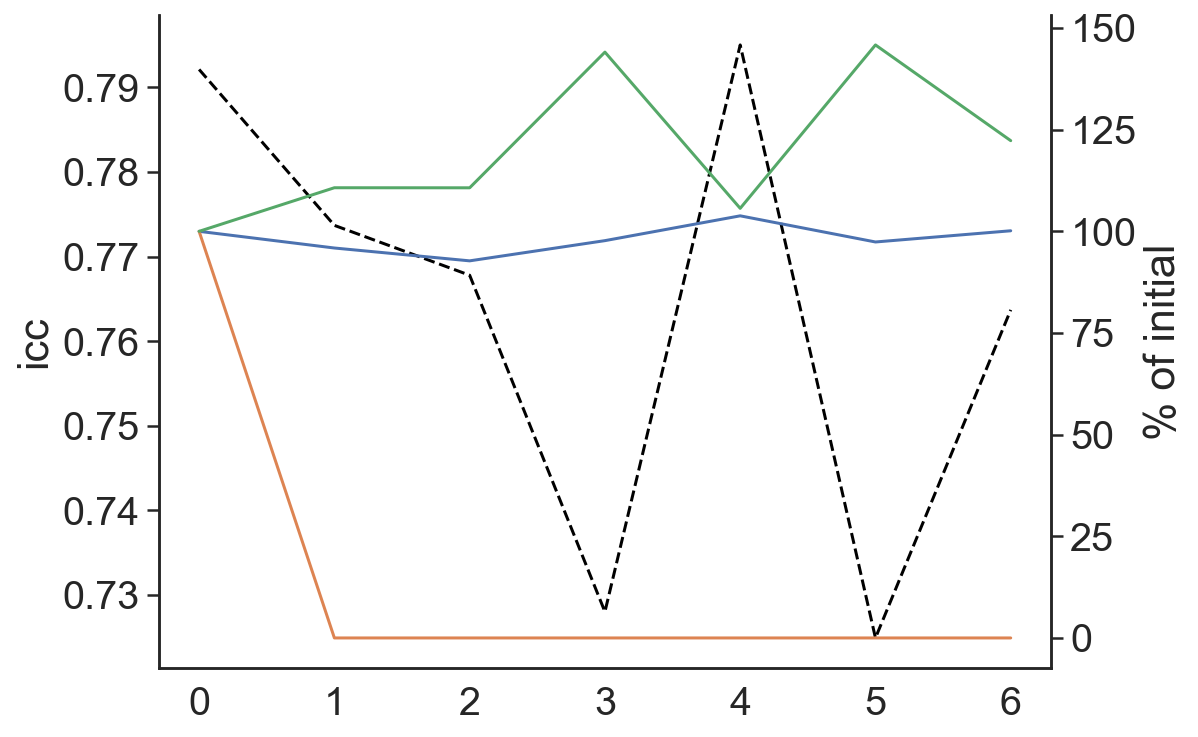

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

## Effect of time (percentage change)

In [ ]:


def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']


def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



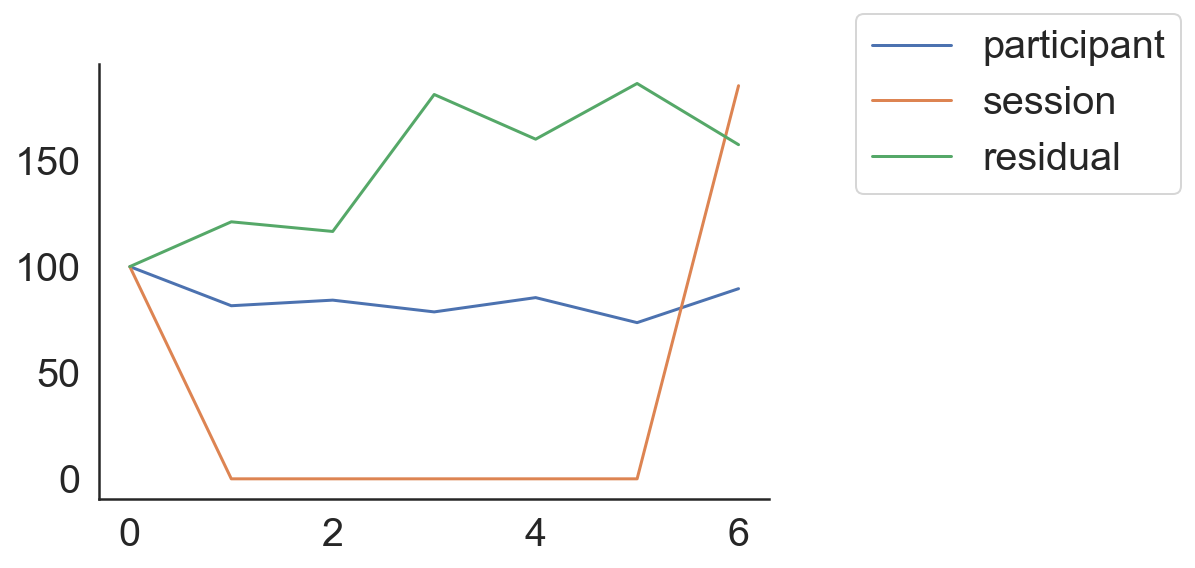

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)

### Loss

N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



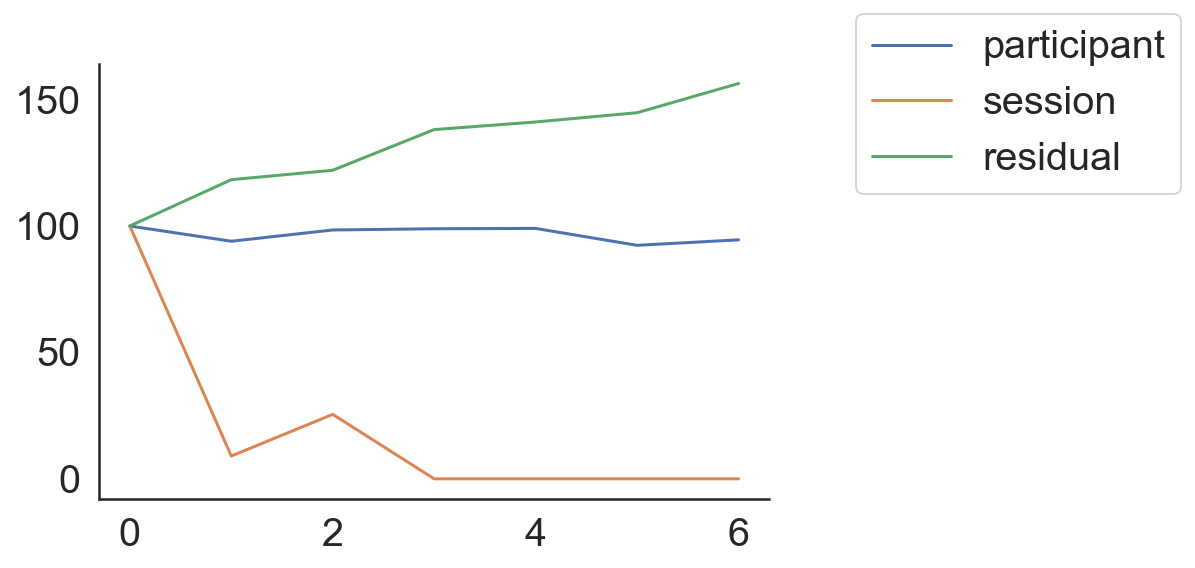

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



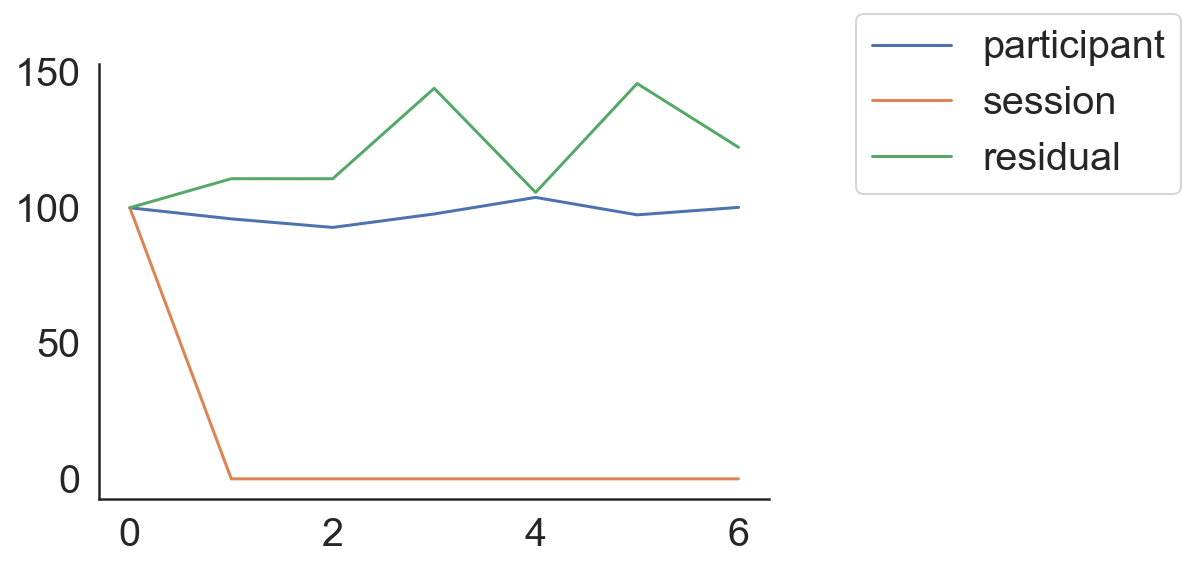

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 98


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



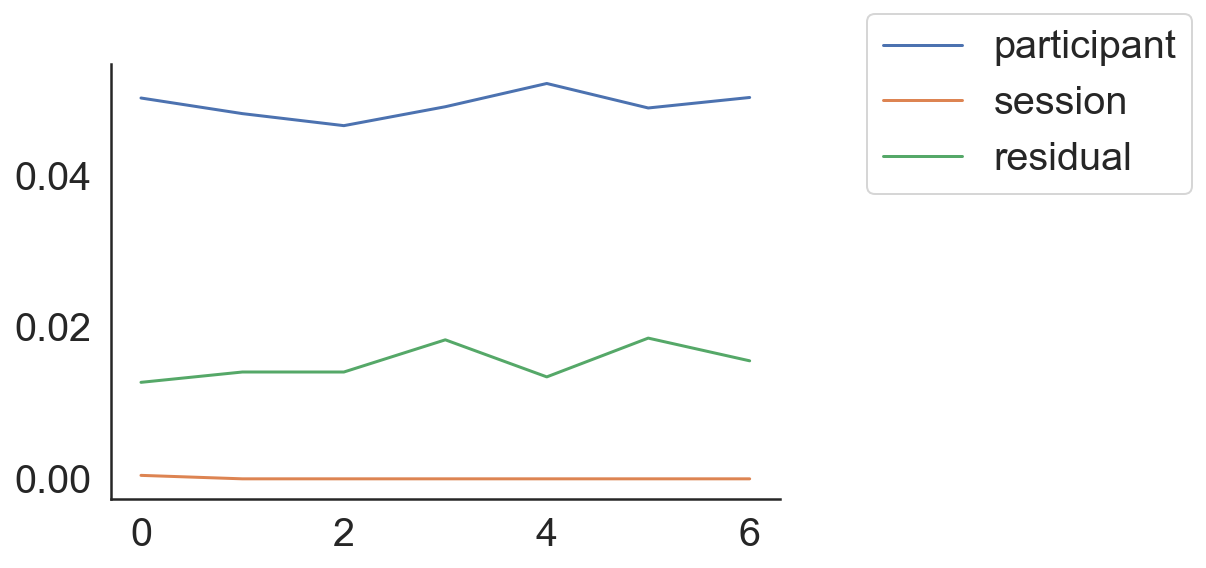

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)